In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "ER Wait Time Dataset.csv"
df = pd.read_csv(file_path, parse_dates=["Visit Date"])

df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

In [2]:
df["hour"] = df["visit_date"].dt.hour
df["month"] = df["visit_date"].dt.month_name()
df["day_name"] = df["visit_date"].dt.day_name()

In [3]:
month_to_season = {
    "December": "Winter", "January": "Winter", "February": "Winter",
    "March": "Spring", "April": "Spring", "May": "Spring",
    "June": "Summer", "July": "Summer", "August": "Summer",
    "September": "Fall", "October": "Fall", "November": "Fall"
}
df["season_auto"] = df["month"].map(month_to_season)

In [4]:
wait_col = "total_wait_time_min"
doc_col = "specialist_availability"

hour_wait = df.groupby("hour")[wait_col].mean().round(1)
hour_docs = df.groupby("hour")[doc_col].mean().round(2)

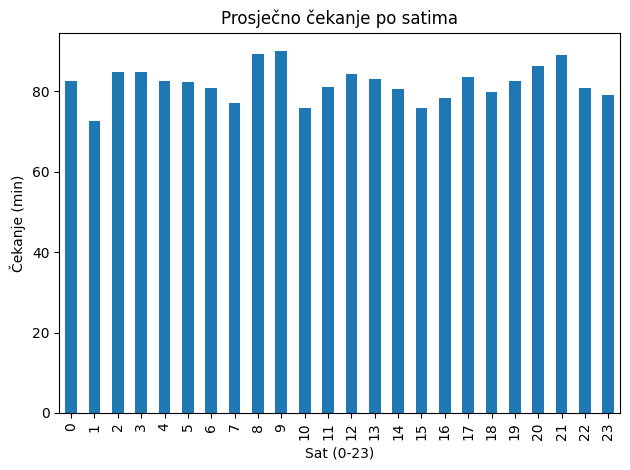

In [5]:
plt.figure()
hour_wait.plot(kind="bar")
plt.title("Prosječno čekanje po satima")
plt.xlabel("Sat (0-23)")
plt.ylabel("Čekanje (min)")
plt.tight_layout()
plt.show()

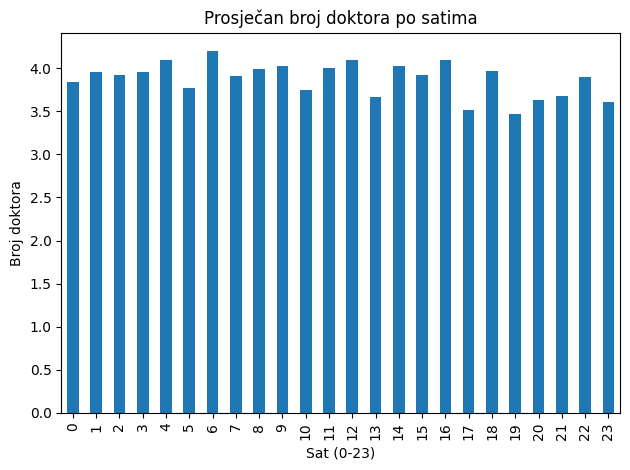

In [6]:
plt.figure()
hour_docs.plot(kind="bar")
plt.title("Prosječan broj doktora po satima")
plt.xlabel("Sat (0-23)")
plt.ylabel("Broj doktora")
plt.tight_layout()
plt.show()

In [7]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_wait = df.groupby("day_name")[wait_col].mean().reindex(day_order).round(1)
day_docs = df.groupby("day_name")[doc_col].mean().reindex(day_order).round(2)

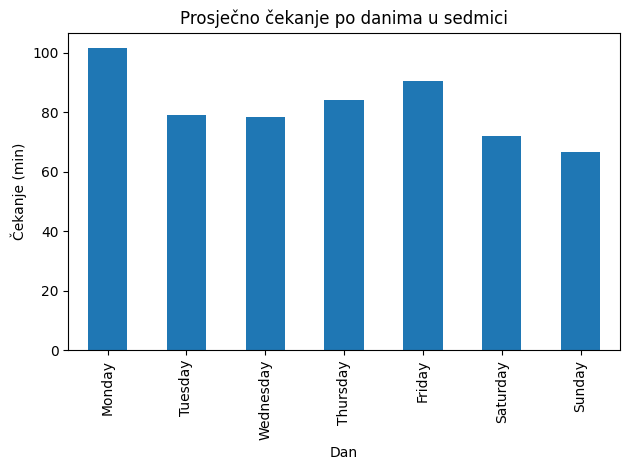

In [8]:
plt.figure()
day_wait.plot(kind="bar")
plt.title("Prosječno čekanje po danima u sedmici")
plt.xlabel("Dan")
plt.ylabel("Čekanje (min)")
plt.tight_layout()
plt.show()

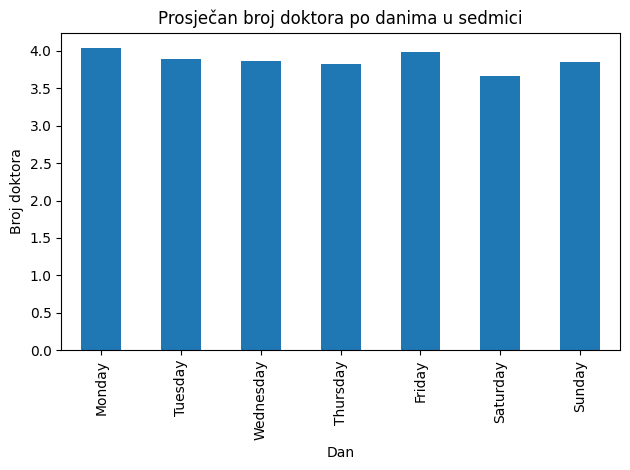

In [9]:
plt.figure()
day_docs.plot(kind="bar")
plt.title("Prosječan broj doktora po danima u sedmici")
plt.xlabel("Dan")
plt.ylabel("Broj doktora")
plt.tight_layout()
plt.show()

In [10]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_wait = df.groupby("month")[wait_col].mean().reindex(month_order).round(1)
month_docs = df.groupby("month")[doc_col].mean().reindex(month_order).round(2)

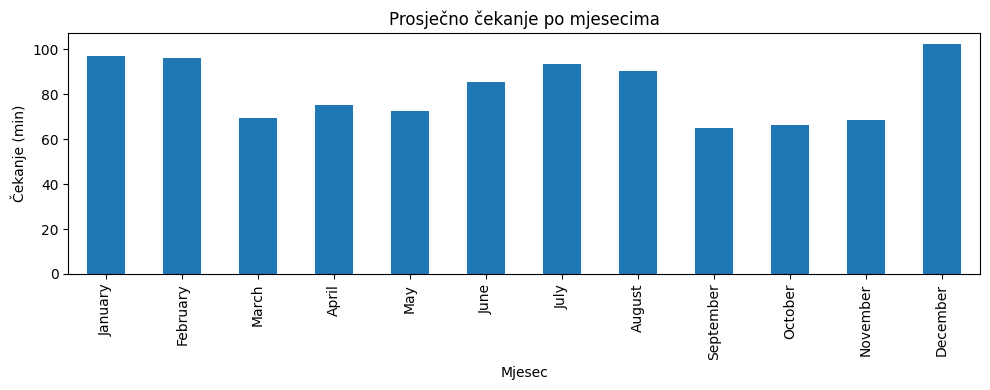

In [11]:
plt.figure(figsize=(10,4))
month_wait.plot(kind="bar")
plt.title("Prosječno čekanje po mjesecima")
plt.xlabel("Mjesec")
plt.ylabel("Čekanje (min)")
plt.tight_layout()
plt.show()

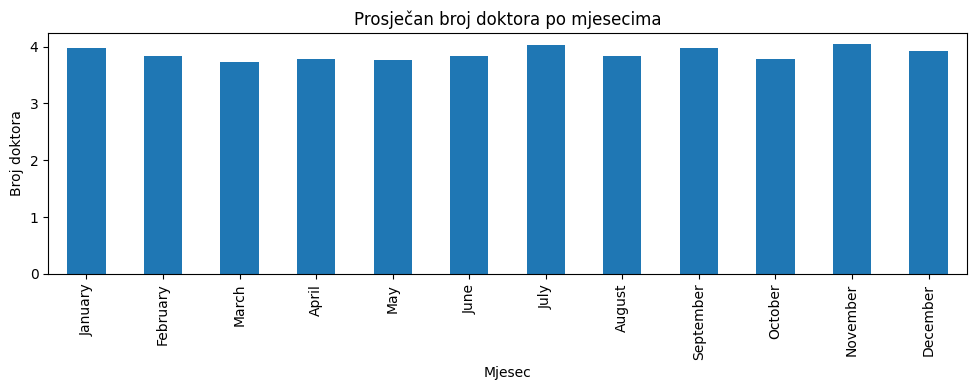

In [12]:
plt.figure(figsize=(10,4))
month_docs.plot(kind="bar")
plt.title("Prosječan broj doktora po mjesecima")
plt.xlabel("Mjesec")
plt.ylabel("Broj doktora")
plt.tight_layout()
plt.show()

In [13]:
season_col = "season" if "season" in df.columns else "season_auto"
season_wait = df.groupby(season_col)[wait_col].mean().round(1)
season_docs = df.groupby(season_col)[doc_col].mean().round(2)

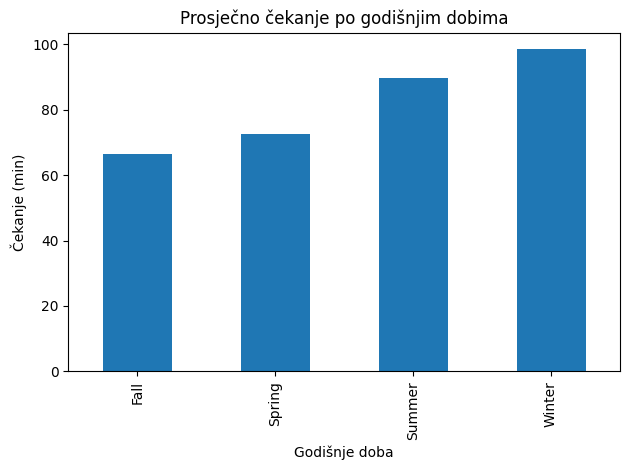

In [14]:
plt.figure()
season_wait.plot(kind="bar")
plt.title("Prosječno čekanje po godišnjim dobima")
plt.xlabel("Godišnje doba")
plt.ylabel("Čekanje (min)")
plt.tight_layout()
plt.show()

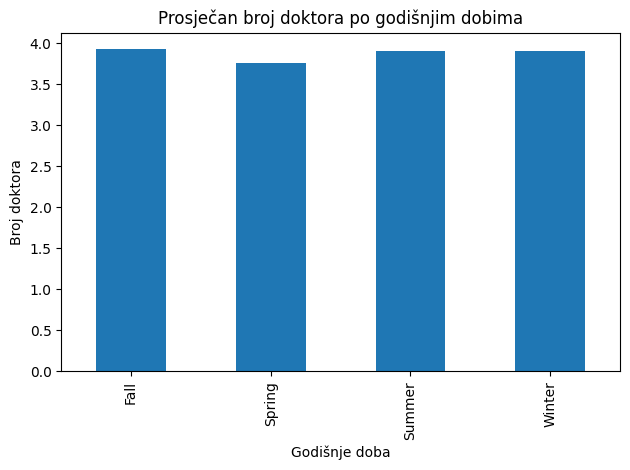

In [15]:
plt.figure()
season_docs.plot(kind="bar")
plt.title("Prosječan broj doktora po godišnjim dobima")
plt.xlabel("Godišnje doba")
plt.ylabel("Broj doktora")
plt.tight_layout()
plt.show()

In [16]:
tod_wait = df.groupby("time_of_day")[wait_col].mean().round(1)
tod_docs = df.groupby("time_of_day")[doc_col].mean().round(2)

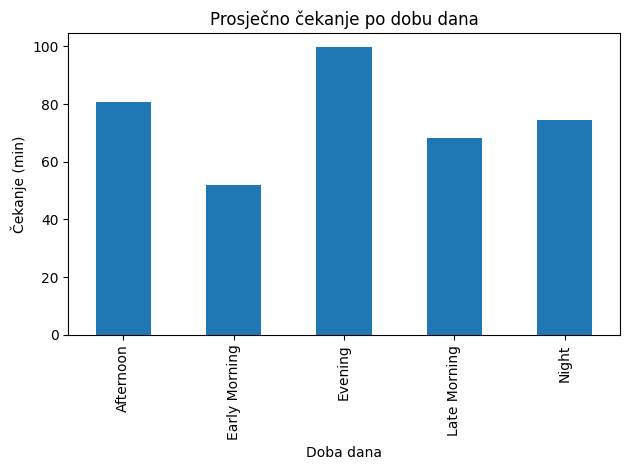

In [17]:
plt.figure()
tod_wait.plot(kind="bar")
plt.title("Prosječno čekanje po dobu dana")
plt.xlabel("Doba dana")
plt.ylabel("Čekanje (min)")
plt.tight_layout()
plt.show()

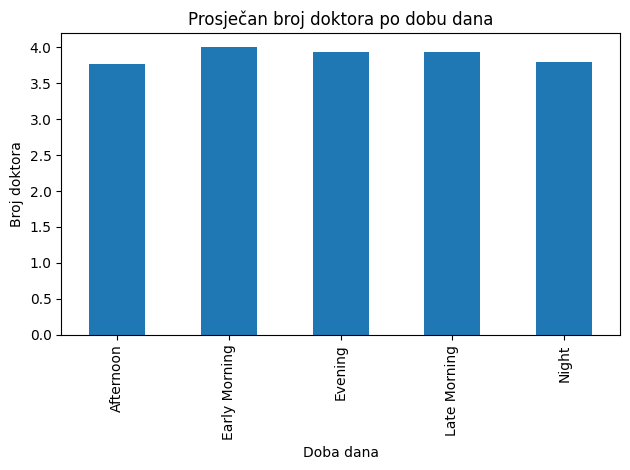

In [18]:
plt.figure()
tod_docs.plot(kind="bar")
plt.title("Prosječan broj doktora po dobu dana")
plt.xlabel("Doba dana")
plt.ylabel("Broj doktora")
plt.tight_layout()
plt.show()

In [19]:
print("Prosjek čekanja po satima")
print(hour_wait.reset_index().rename(columns={wait_col: "avg_wait_min"}))
print()

Prosjek čekanja po satima
    hour  avg_wait_min
0      0          82.5
1      1          72.7
2      2          84.7
3      3          84.7
4      4          82.6
5      5          82.4
6      6          80.9
7      7          77.1
8      8          89.2
9      9          90.0
10    10          75.8
11    11          81.0
12    12          84.3
13    13          83.1
14    14          80.5
15    15          75.8
16    16          78.2
17    17          83.6
18    18          79.8
19    19          82.5
20    20          86.2
21    21          89.1
22    22          80.8
23    23          79.0



In [20]:
print("Prosjek doktora po satima")
print(hour_docs.reset_index().rename(columns={doc_col: "avg_doctors"}))
print()

Prosjek doktora po satima
    hour  avg_doctors
0      0         3.84
1      1         3.95
2      2         3.92
3      3         3.95
4      4         4.09
5      5         3.77
6      6         4.20
7      7         3.91
8      8         3.99
9      9         4.02
10    10         3.75
11    11         4.00
12    12         4.09
13    13         3.67
14    14         4.03
15    15         3.92
16    16         4.10
17    17         3.51
18    18         3.97
19    19         3.47
20    20         3.63
21    21         3.68
22    22         3.90
23    23         3.61



In [21]:
print("Prosjek čekanja po danima")
print(day_wait.reset_index().rename(columns={wait_col: "avg_wait_min"}))
print()

Prosjek čekanja po danima
    day_name  avg_wait_min
0     Monday         101.6
1    Tuesday          79.1
2  Wednesday          78.3
3   Thursday          84.2
4     Friday          90.4
5   Saturday          72.1
6     Sunday          66.6



In [22]:
print("Prosjek doktora po danima")
print(day_docs.reset_index().rename(columns={doc_col: "avg_doctors"}))
print()

Prosjek doktora po danima
    day_name  avg_doctors
0     Monday         4.04
1    Tuesday         3.89
2  Wednesday         3.87
3   Thursday         3.82
4     Friday         3.99
5   Saturday         3.66
6     Sunday         3.85



In [23]:
print("Prosjek čekanja po mjesecima")
print(month_wait.reset_index().rename(columns={wait_col: "avg_wait_min"}))
print()

Prosjek čekanja po mjesecima
        month  avg_wait_min
0     January          97.0
1    February          96.3
2       March          69.3
3       April          75.2
4         May          72.5
5        June          85.4
6        July          93.6
7      August          90.2
8   September          64.9
9     October          66.2
10   November          68.4
11   December         102.3



In [24]:
print("Prosjek čekanja po godišnjim dobima")
print(season_wait.reset_index().rename(columns={wait_col: "avg_wait_min"}))
print()

Prosjek čekanja po godišnjim dobima
   season  avg_wait_min
0    Fall          66.4
1  Spring          72.4
2  Summer          89.7
3  Winter          98.5



In [25]:
print("Prosjek doktora po godišnjim dobima")
print(season_docs.reset_index().rename(columns={doc_col: "avg_doctors"}))
print()

Prosjek doktora po godišnjim dobima
   season  avg_doctors
0    Fall         3.93
1  Spring         3.76
2  Summer         3.90
3  Winter         3.91



In [26]:
print("Prosjek čekanja po dobu dana")
print(tod_wait.reset_index().rename(columns={wait_col: "avg_wait_min"}))
print()

Prosjek čekanja po dobu dana
     time_of_day  avg_wait_min
0      Afternoon          80.6
1  Early Morning          52.1
2        Evening          99.7
3   Late Morning          68.1
4          Night          74.6



In [27]:
print("Prosjek doktora po dobu dana")
print(tod_docs.reset_index().rename(columns={doc_col: "avg_doctors"}))
print()

Prosjek doktora po dobu dana
     time_of_day  avg_doctors
0      Afternoon         3.77
1  Early Morning         4.00
2        Evening         3.94
3   Late Morning         3.93
4          Night         3.79

